# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from Self_Written_Functions_Sheet import rmse, conversion

%store -r

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,TotalPorchSF,YrsRemodToSold,LotFrontage,BsmtUnfin,2ndFlr,LowQualFin,Porches,Decks,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_

In [3]:
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [4]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train and test sets
xtrain_full, xtest_full, ytrain_full, ytest_full = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)
# Must flatten to fit
ytrain_full = ytrain_full.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain_full, ytrain_full)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain_full, ytrain_full))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest_full, ytest_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain_full, xtrain_full)) 
test_rmse.append(rmse(gs_mlr_1, ytest_full, xtest_full))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_full = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_full

Wall time: 2.25 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.950359,-2.503157e+16,0.088309,6.513229e+07,-6.513229e+07,False,True


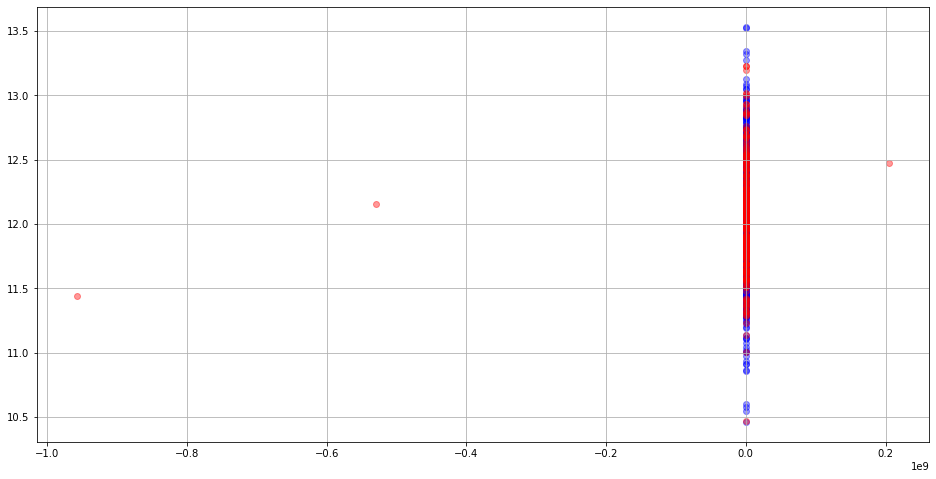

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)
plt.grid(which='both')

In [6]:
gs_mlr_1.best_estimator_.predict(xtrain_full)

array([12.04958057, 11.43676455, 11.7028966 , ..., 12.39920497,
       11.94498062, 12.30642986])

In [7]:
ytrain_full

array([12.00150548, 11.41861479, 11.68687877, ..., 12.34346657,
       11.70766954, 12.24288662])

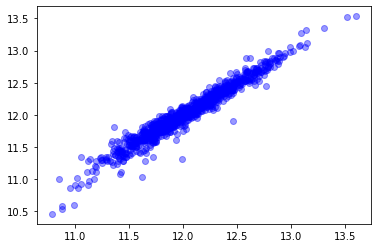

In [8]:
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)

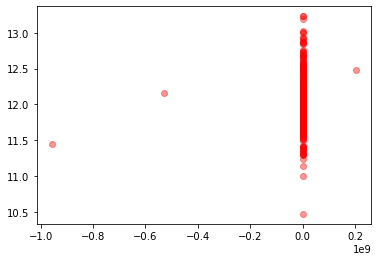

In [9]:
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)

# might not just be overfitting:
    # in training set:
        # example - 4 bedrooms w/ high price
        # might encounter a datapoint that doesn't have exposure to a certain value of a feature

In [10]:
test_df = pd.DataFrame(gs_mlr_1.best_estimator_.predict(xtest_full))
test_df.columns = ['logsaleprice']

test_df[(test_df['logsaleprice']<0)]

,logsaleprice
25,-5.297159e+08
160,-9.572225e+08


In [11]:
test_df[(test_df['logsaleprice']>0.20)]

,logsaleprice
0,11.800261
1,12.005115
2,11.492847
3,11.794278
4,12.650868
...,...
287,11.849508
288,12.125363
289,11.910339
290,11.538435


In [12]:
xtest_full.iloc[[25, 160, 172], :]

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,TotalPorchSF,YrsRemodToSold,LotFrontage,BsmtUnfin,2ndFlr,LowQualFin,Porches,Decks,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_

In [13]:
ytest_full = ytest_full.reset_index()
ytest_full

,index,SalePrice
0,411,11.884489
1,211,12.133502
2,342,11.379394
3,303,11.917724
4,159,12.676076
...,...,...
287,92,12.004568
288,811,11.881035
289,295,11.867097
290,1001,11.362103


In [14]:
# comparing the data where the differences are large
data_comparison = pd.concat([ytest_full, test_df], axis=1, ignore_index=True, sort=False)
data_comparison.columns = ['index', 'ytest', 'xtestPredict']
data_comparison['Difference'] = np.abs(data_comparison.xtestPredict) - np.abs(data_comparison.ytest)
data_comparison[np.abs(data_comparison['Difference'])>0.2]

,index,ytest,xtestPredict,Difference
17,107,11.652687,1.136200e+01,-2.906857e-01
25,1230,12.154779,-5.297159e+08,5.297159e+08
44,298,12.072541,1.232547e+01,2.529335e-01
51,308,11.320554,1.153392e+01,2.133696e-01
59,142,12.019743,1.169415e+01,-3.255936e-01
64,9,11.678440,1.217239e+01,4.939510e-01
68,1170,12.049419,1.124118e+01,-8.082348e-01
71,529,12.209188,1.247180e+01,2.626162e-01
108,1383,11.626254,1.185670e+01,2.304429e-01
122,393,11.512925,1.127109e+01,-2.418381e-01


## Using hp_full_myversion dataset

In [15]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train and test sets
xtrain_myver, xtest_myver, ytrain_myver, ytest_myver = ms.train_test_split(hp_full_myversion,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain_myver = ytrain_myver.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_myver = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_myver = ms.GridSearchCV(lm, gparam_mlr_myver, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_myver.fit(xtrain_myver, ytrain_myver)

# setting up dataframe for results
train_scores.append(gs_mlr_myver.best_estimator_.score(xtrain_myver, ytrain_myver))
test_scores.append(gs_mlr_myver.best_estimator_.score(xtest_myver, ytest_myver))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_myver, ytrain_myver, xtrain_myver))
test_rmse.append(rmse(gs_mlr_myver, ytest_myver, xtest_myver))

# add the best parameters to the df
best_par_list.append(gs_mlr_myver.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_full = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_full

Wall time: 1.35 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.942819,-1.066139e+17,0.094779,1.344186e+08,-1.344186e+08,False,True


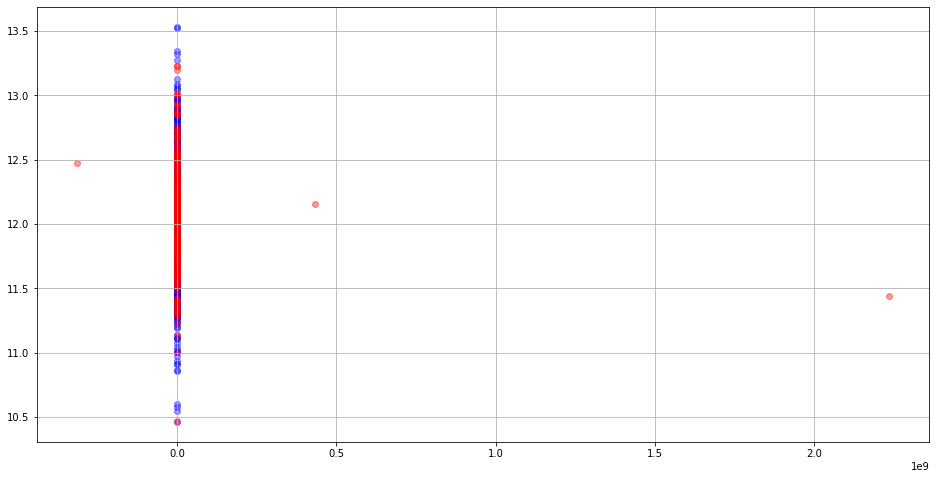

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_myver.best_estimator_.predict(xtrain_myver), ytrain_myver, color='blue', alpha=0.4)
plt.scatter(gs_mlr_myver.best_estimator_.predict(xtest_myver), ytest_myver, color='red', alpha=0.4)
plt.grid(which='both')

- We see that even the reduced dataset that I created causes severe outliers
- This may be due to multicollinearity in features that I failed to remove

## Trying with Lasso

In [17]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_full and test_full sets
xtrain_full, xtest_full, ytrain_full, ytest_full = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain_full = ytrain_full.values.flatten()

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain_full, ytrain_full)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain_full, ytrain_full))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest_full, ytest_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain_full, xtrain_full))
test_rmse.append(rmse(gs_lasso_1, ytest_full, xtest_full))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df_full = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_full

Wall time: 440 ms


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.929381,0.939448,0.105329,0.101302,0.004027,0.000141


In [18]:
# we see underfitting above

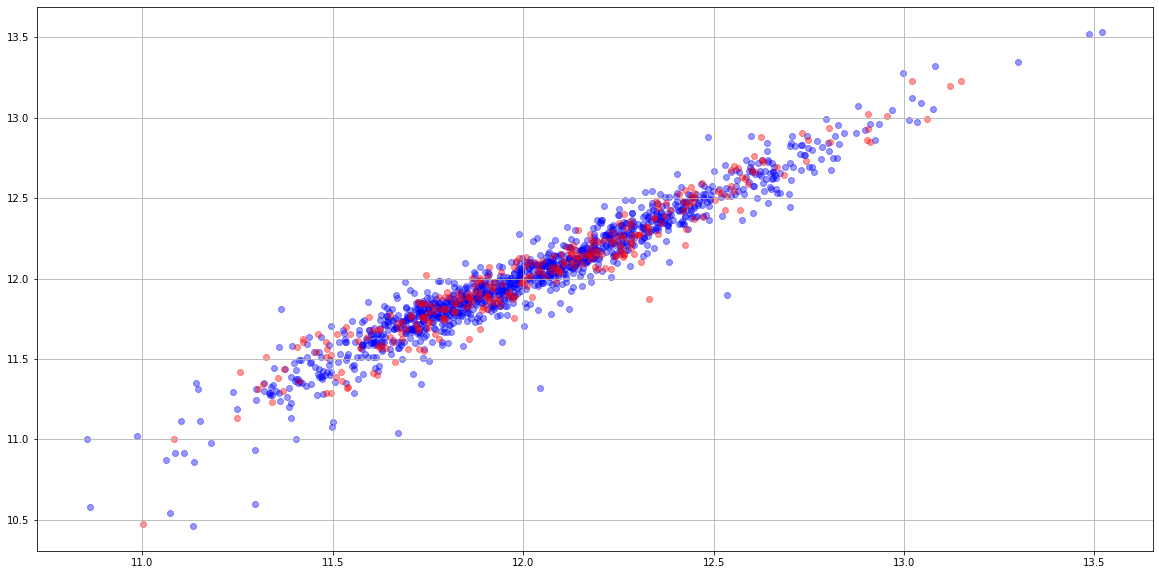

In [19]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)
plt.grid(which='both')

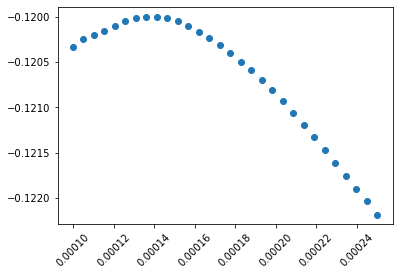

In [20]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [21]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

Functional_Sev           0.214523
PoolQC_Gd                0.179664
Functional_Maj2          0.129914
GrLivArea                0.127113
Exterior1st_BrkComm      0.109772
Neighborhood_Crawfor     0.094769
Street_Pave              0.090359
SaleCondition_Partial    0.083592
Heating_Grav             0.083489
Neighborhood_StoneBr     0.082888
OverallQual              0.077654
MSZoning_FV              0.063848
Neighborhood_MeadowV     0.063610
MSSubClass_160           0.063444
CentralAir_Y             0.054218
MSZoning_RL              0.049595
SaleType_ConLI           0.048366
Neighborhood_IDOTRR      0.045545
BsmtQual_Ex              0.043204
YearBuilt                0.042689
Functional_Typ           0.041994
Neighborhood_NridgHt     0.040479
TotalBsmtSF              0.039106
BsmtExposure_Gd          0.038356
OverallCond              0.037510
SaleCondition_Normal     0.037012
Condition1_Norm          0.033773
Exterior1st_BrkFace      0.030914
ExterCond_Fa             0.030422
GarageType_Bas

In [34]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

%store hp_lasso_strd_reduced
hp_lasso_strd_reduced

Stored 'lasso_coef_index_01' (list)
Stored 'hp_lasso_strd_reduced' (DataFrame)


,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,TotalBaths,BsmtFinTotalSF,TotalPorchSF,YrsRemodToSold,LotFrontage,LowQualFin,Decks,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,BldgType_Twnhs,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_Wd Sdng,Exterior2nd_Stucco,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtCond_Fa,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType2_BLQ,Heating_Grav,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Gd,GarageType_Basment,GarageType_CarPort,GarageQual_Ex,GarageQual_Gd,GarageCond_Fa,GarageCond_TA,PavedDrive_Y,PoolQC_Gd,Fence_GdWo,SaleType_ConLI,SaleType_New,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_160
0,-0.203934,0.658506,-0.517649,1.052959,0.523014,0.617283,-0.473766,-0.814309,0.393013,1.113886,1.229699,-0.211605,0.921812,-0.952231,0.296262,0.313159,0.357973,-0.750831,-0.270407,1.174852,0.485432,-0.245576,-0.871676,-0.231855,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.087252,-0.068293,2.177825,0.158428,-0.571872,1.245719,0.504925,0.277348,-0.489391,-0.819502,-0.760202,-0.211605,-0.316329,0.605965,0.236767,0.313159,-0.056795,1.627328,-0.270407,0.386571,1.084079,-0.827879,0.388660,0.467597,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.080162,0.658506,-0.517649,0.986698,0.333085,0.108989,-0.319490,-0.642225,0.542706,1.113886,1.229699,-0.211605,-0.316329,0.605965,0.291855,0.313159,0.640770,-0.750831,-0.270407,1.174852,0.001232,-0.426949,-0.823201,-0.091965,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.092325,0.658506,-0.517649,-1.862551,-0.571872,-0.514826,-0.714823,-0.531984,0.406800,1.113886,-0.760202,-0.211605,0.302742,0.605965,0.285244,1.652119,0.801022,-0.750831,-0.270407,-1.189990,-0.593014,2.102728,0.631032,-0.465006,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.385566,1.385305,-0.517649,0.953567,1.383282,0.499451,0.222888,-0.037243,1.354202,1.113886,1.229699,-0.211605,1.540882,0.605965,0.289651,1.652119,1.715398,0.781406,-0.270407,1.174852,0.373185,-0.026019,-0.726252,0.654117,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [23]:
# Wanted to check which columns that I added made it through lasso:

[x for x in hp_myversion.columns if x in hp_lasso_strd_reduced]

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'ScreenPorch',
 'TotalBaths',
 'BsmtFinTotalSF',
 'LowQualFin',
 'TotalPorchSF',
 'Decks',
 'YrsRemodToSold']

### Columns that I created that made it through:
- Total Baths
- BsmtFinTotalSF
- LowQualFin
- TotalPorchSF
- Decks
- YrsRemodToSold

### Columns that I created that did NOT make it through:
- BsmtBaths
- BsmtUnfin
- 2ndFlr
- Porches

In [24]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['YearRemodAdd',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtBaths',
 'BsmtUnfin',
 '2ndFlr',
 'Porches',
 'MSZoning_RH',
 'MSZoning_RM',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',

## using the lasso reduced dataset in multilinear regression

In [25]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
fitintercept = [True, False]
gparam_mlr_lso = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr_lso = ms.GridSearchCV(lm, gparam_mlr_lso, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_lso.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr_lso.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr_lso.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_lso, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr_lso, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr_lso.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 26.5 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.936111,0.934349,0.100184,0.105481,-0.005297,True


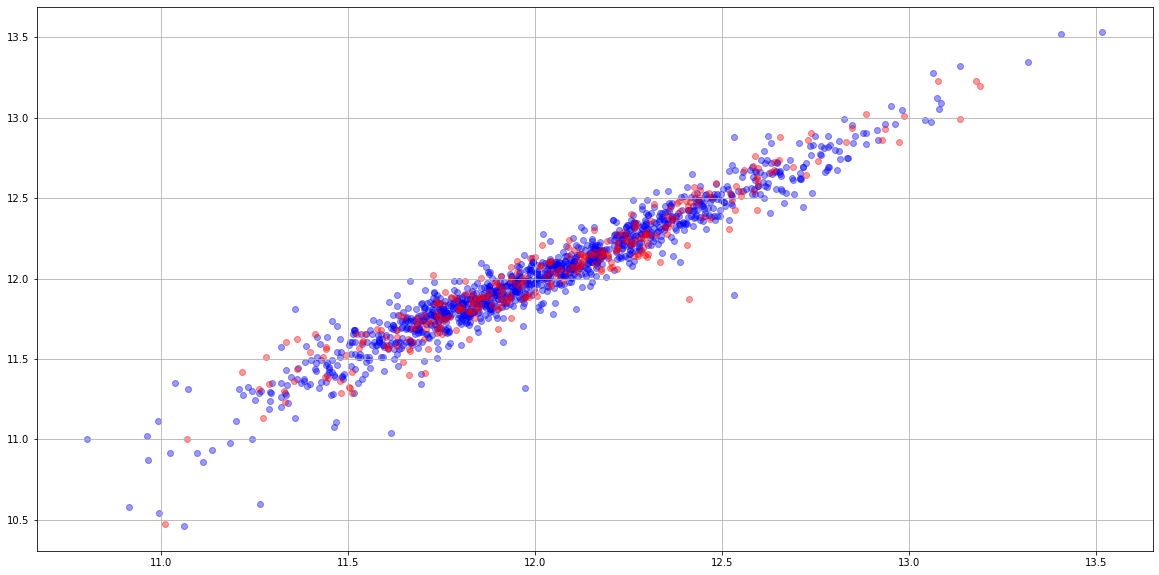

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

In [27]:
# Storing parameters 
mlr_lasso_std_red = LinearRegression(n_jobs=-1, fit_intercept=True)

%store mlr_lasso_std_red

Stored 'mlr_lasso_std_red' (LinearRegression)


## Trying Lasso Using hp_full_myversion

In [28]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train and test sets
xtrain_myver, xtest_myver, ytrain_myver, ytest_myver = ms.train_test_split(hp_full_myversion,
                                                                           hp_logsaleprice,
                                                                           test_size=0.2,
                                                                           random_state=state)

# Must flatten to fit
ytrain_myver = ytrain_myver.values.flatten()

lasso = Lasso(random_state=state, max_iter=1000000, selection='random', normalize=True)

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
alphas = np.linspace(5e-5, 2.5e-4, 30)
fitintercept = [True, False]
gparam_lasso_myver = {'alpha': alphas,
                      'fit_intercept': fitintercept}

# setting parameters
gs_lasso_myver = ms.GridSearchCV(lasso, gparam_lasso_myver, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_myver.fit(xtrain_myver, ytrain_myver)

# setting up dataframe for results
train_scores.append(gs_lasso_myver.best_estimator_.score(xtrain_myver, ytrain_myver))
test_scores.append(gs_lasso_myver.best_estimator_.score(xtest_myver, ytest_myver))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_myver, ytrain_myver, xtrain_myver))
test_rmse.append(rmse(gs_lasso_myver, ytest_myver, xtest_myver))

# add the best parameters to the df
best_par_list.append(gs_lasso_myver.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df_out = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df_out

Wall time: 5.37 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,alpha,fit_intercept
0,0.932676,0.914919,0.102842,0.120079,-0.017237,0.000064,True


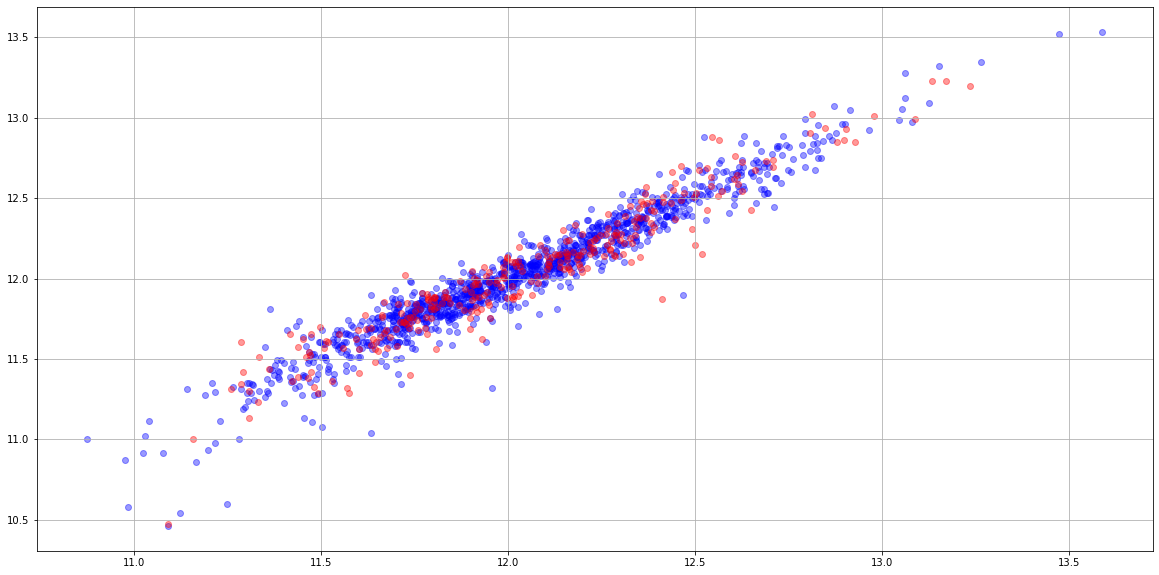

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_myver.best_estimator_.predict(xtrain_myver), ytrain_myver, color='blue', alpha=0.4)
plt.scatter(gs_lasso_myver.best_estimator_.predict(xtest_myver), ytest_myver, color='red', alpha=0.4)
plt.grid(which='both')

## Using reduced DF hp_full_myversion

In [30]:
lasso_coef_myversion = pd.Series(gs_lasso_myver.best_estimator_.coef_, index=hp_full_myversion.columns)
print(lasso_coef_myversion.abs().sort_values(ascending=False).to_string())

Functional_Sev           0.212964
RoofStyle_Shed           0.189454
Neighborhood_StoneBr     0.176835
Condition2_PosA          0.176188
Street_Pave              0.159062
Exterior1st_BrkComm      0.142818
RoofMatl_Membran         0.142814
Neighborhood_MeadowV     0.136134
Functional_Maj2          0.135677
GrLivArea                0.126819
Heating_Grav             0.121663
SaleCondition_Partial    0.112737
Neighborhood_NridgHt     0.110115
Neighborhood_IDOTRR      0.095123
Utilities_NoSeWa         0.088511
MSZoning_FV              0.087797
SaleType_CWD             0.087342
SaleType_ConLI           0.084945
GarageType_CarPort       0.084441
CentralAir_Y             0.078017
RoofMatl_Metal           0.077319
Neighborhood_Crawfor     0.076202
RoofMatl_WdShngl         0.074134
GarageCond_Fa            0.070202
Neighborhood_OldTown     0.069493
MSSubClass_30            0.068969
KitchenQual_TA           0.068966
Functional_Typ           0.065733
Condition2_RRAn          0.065071
Exterior1st_CB

In [31]:
lasso_coef_index_02 = [i for i, x in enumerate(lasso_coef_myversion) if abs(x) > 0.01]

hp_lasso_myversion_reduced = hp_full_myversion.iloc[:,lasso_coef_index_02]

%store hp_lasso_myversion_reduced
hp_lasso_myversion_reduced

Stored 'hp_lasso_myversion_reduced' (DataFrame)


,LotArea,OverallCond,TotalBsmtSF,GrLivArea,BsmtFullBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,TotalBaths,BsmtFinTotalSF,YrsRemodToSold,LowQualFin,Porches,Decks,MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,LotShape_IR2,LandContour_HLS,LandContour_Low,Utilities_NoSeWa,LotConfig_CulDSac,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_PosA,Condition2_RRAn,BldgType_Twnhs,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_Stucco,Exterior2nd_AsphShn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_Other,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_Stone,ExterCond_Fa,ExterCond_Po,Foundation_PConc,BsmtCond_Fa,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,Heating_Grav,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_CarPort,GarageCond_Ex,GarageCond_Fa,PavedDrive_Y,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_160
0,-0.203934,-0.517649,-0.473766,0.393013,1.113886,-0.211605,-0.952231,0.296262,0.313159,1.174852,0.485432,-0.871676,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.087252,2.177825,0.504925,-0.489391,-0.819502,-0.211605,0.605965,0.236767,0.313159,0.386571,1.084079,0.388660,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.080162,-0.517649,-0.319490,0.542706,1.113886,-0.211605,0.605965,0.291855,0.313159,1.174852,0.001232,-0.823201,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.092325,-0.517649,-0.714823,0.406800,1.113886,-0.211605,0.605965,0.285244,1.652119,-1.189990,-0.593014,0.631032,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.385566,-0.517649,0.222888,1.354202,1.113886,-0.211605,0.605965,0.289651,1.652119,1.174852,0.373185,-0.726252,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

- Based on the above, it seems that using the full dataset from hp_full_myversion is better than using a subset of the data

In [32]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso_myver, xtest_lso_myver, ytrain_lso_myver, ytest_lso_myver = ms.train_test_split(hp_lasso_myversion_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso_myver = ytrain_lso_myver.values.flatten()

lm = LinearRegression()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
fitintercept = [True, False]
gparam_mlr_lso = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr_lso_myver = ms.GridSearchCV(lm, gparam_mlr_lso, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_lso_myver.fit(xtrain_lso_myver, ytrain_lso_myver)

# setting up dataframe for results
train_scores.append(gs_mlr_lso_myver.best_estimator_.score(xtrain_lso_myver, ytrain_lso_myver))
test_scores.append(gs_mlr_lso_myver.best_estimator_.score(xtest_lso_myver, ytest_lso_myver))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_lso_myver, ytrain_lso_myver, xtrain_lso_myver))
test_rmse.append(rmse(gs_mlr_lso_myver, ytest_lso_myver, xtest_lso_myver))

# add the best parameters to the df
best_par_list.append(gs_mlr_lso_myver.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 30 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.933776,0.905733,0.101998,0.126396,-0.024397,True


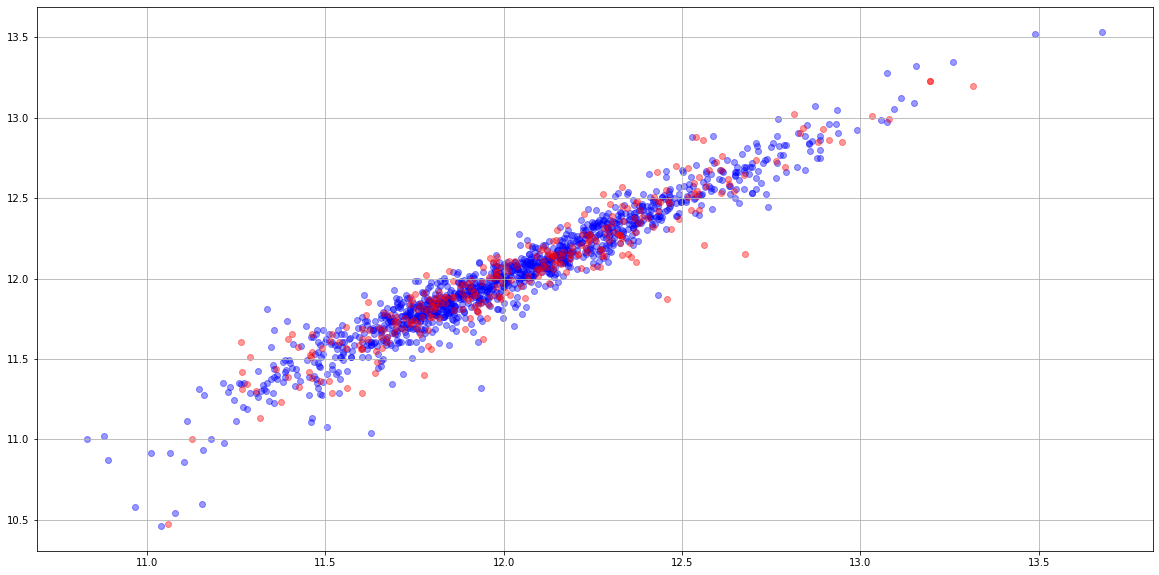

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr_lso_myver.best_estimator_.predict(xtrain_lso_myver), ytrain_lso_myver, color='blue', alpha=0.4)
plt.scatter(gs_mlr_lso_myver.best_estimator_.predict(xtest_lso_myver), ytest_lso_myver, color='red', alpha=0.4)
plt.grid(which='both')

### Based on the findings, it would be better to use 

- hp_lasso_strd_reduced since the difference between the RMSEs of the train and test sets were smaller than that of hp_lasso_myversion_reduced